In [2]:
# Import modules
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
# numpy, matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Download data
!wget -O training_data.csv http://handsonml.control.lth.se/data/training_data.csv
!wget -O songs_to_classify.csv http://handsonml.control.lth.se/data/songs_to_classify.csv

In [4]:
# Load data
train = pd.read_csv("training_data.csv")
test_classify = pd.read_csv("songs_to_classify.csv")

In [5]:
df = pd.read_csv('training_data.csv')
# select which features to use
#features = ['danceability','key','loudness','instrumentalness','liveness']
features = ['danceability','acousticness', 'instrumentalness', 'energy', 'valence',
            'loudness', 'liveness', 'speechiness', 'tempo']
X = df.loc[:,features].values
y = df.loc[:,'label'].values


# Split into dataset into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X_trainn = sc.fit_transform(X_train)
X_testn = sc.transform(X_test)

In [21]:
model_poly = OneVsRestClassifier((svm.SVC(kernel='poly', degree = 3, gamma=1, C=0.01, probability=True)))
model_poly.fit(X_trainn, np.ravel(y_train))

OneVsRestClassifier(estimator=SVC(C=0.01, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=1, kernel='poly', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [ ]:
# Calculate accuracy: Evaluate the models using cross-validation
# Make Predictions on Test Data and compare with truth
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_poly, X, np.ravel(y), cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()))
score = model_poly.score(X_testn, np.ravel(y_test))
print('Test score (Validation): ', '{0:.4f}'.format(score*100))

In [22]:
score = model_poly.score(X_testn, np.ravel(y_test))
print('Test score (Validation): ', '{0:.4f}'.format(score*100))

Test score (Validation):  86.0000


In [23]:
preds_p = model_poly.predict(X_testn)

Text(0.5, 1.0, 'Accuracy Score: 0.86')

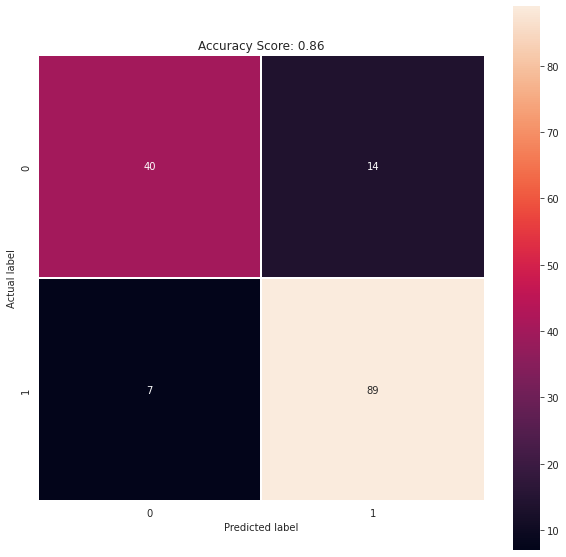

In [24]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, preds_p)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(model_poly.score(X_testn, np.ravel(y_test)), size = 15))


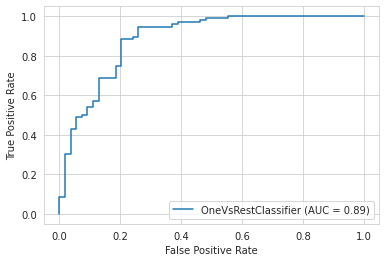

In [23]:
from sklearn import metrics
metrics.plot_roc_curve(model_poly, X_testn, y_test)

In [24]:
test = test_classify.loc[:,features].values
testn = sc.transform(test)

In [26]:
final_y = model_poly.predict(testn)

In [27]:
final =''.join(str(final_y).split(' ,')).replace(" ", "").replace('\n', "")
final

'[01010111001101111111001110101011011111010101110110011101100011101111101111110110111111101010011011111111010111110011111001111110101111111111101011011011001111101100111111111001111010111110100111111111]'